In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
path = "/content/Restaurant_Reviews.tsv"
df = pd.read_csv(path, sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


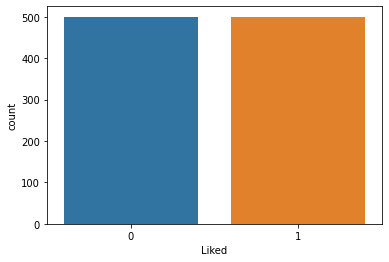

In [ ]:
sns.countplot(x='Liked', data=df)

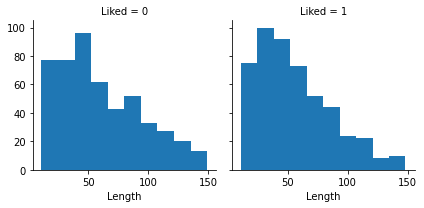

In [ ]:
x = sns.FacetGrid(df,col='Liked')
x.map(plt.hist,'Length')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78dfd7d250>,
      dtype=object)

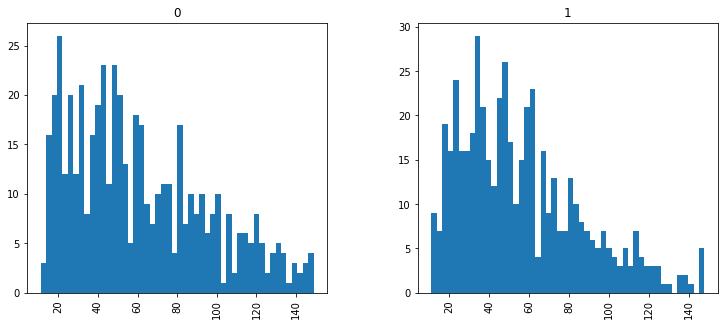

In [ ]:
df.hist(column='Length', by='Liked', bins=50, figsize=(12,5))

In [ ]:
df.replace({'Liked':{0:'Negative',1:'Positive'}}, inplace=True)
df

,Review,Liked,Length
0,Wow... Loved this place.,Positive,24
1,Crust is not good.,Negative,18
2,Not tasty and the texture was just nasty.,Negative,41
3,Stopped by during the late May bank holiday of...,Positive,87
4,The selection on the menu was great and so wer...,Positive,59
...,...,...,...
995,I think food should have flavor and texture an...,Negative,66
996,Appetite instantly gone.,Negative,24
997,Overall I was not impressed and would not go b...,Negative,50
998,"The whole experience was underwhelming, and I ...",Negative,91


In [ ]:
x = df['Review'].values
y = df['Liked'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')

x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model1 = SVC()

In [ ]:
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negati

In [ ]:
y_test

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.72

In [ ]:
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.792

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negati

In [ ]:
y_test

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.744

In [ ]:
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array(['Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.784

In [ ]:
#model1 accuracy - 0.72
#model2 accuracy - 0.792
#model3 accuracy - 0.744
#model4 accuracy - 0.784

In [ ]:
import joblib
joblib.dump(model2,'positive-negetive')

['positive-negetive']

In [ ]:
reloaded_model = joblib.load('positive-negetive')
reloaded_model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
!pip install streamlit --quiet

     |████████████████████████████████| 9.2 MB 26.7 MB/s 
     |████████████████████████████████| 164 kB 62.1 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 4.7 MB 72.2 MB/s 
     |████████████████████████████████| 181 kB 60.5 MB/s 
     |████████████████████████████████| 235 kB 78.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 


In [ ]:
%%writefile app.py
#import the libraries
import streamlit as st
import joblib

#Add the title
st.title("Positive Negative classification")

# load the joblib model
reloaded_model = joblib.load('positive-negetive')

# give the user input for doing the prediction
input1 = st.text_input("Enter the message :")

# use the joblib reloaded model to predict the output as spam or ham
output1 = reloaded_model.predict([input1])


# if the PREDICT button is pressed, then give the output in the webapp
if st.button("PREDICT"):
  st.title([output1[0]])

Writing app.py


In [ ]:
!streamlit run app.py  & npx localtunnel --port 8501

2022-09-24 12:14:13.478 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[#.................] | fetchMetadata: sill resolveWithNewModule follow-redirect


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.236.224.96:8501

npx: installed 22 in 6.848s
your url is: https://lovely-walls-join-35-236-224-96.loca.lt
